In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16, 10]
plt.rcParams['font.size'] = 16
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.tsv
train.tsv



In [2]:
train = pd.read_csv('../input/train.tsv', delimiter='\t', encoding='utf-8')
test = pd.read_csv('../input/test.tsv', delimiter='\t', encoding='utf-8')

print(train.columns, train.shape)

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object') (1482535, 8)


In [3]:
train.head(20)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [5]:
train.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [6]:
print(test.columns, test.shape)

Index(['test_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'shipping', 'item_description'],
      dtype='object') (693359, 7)


In [7]:
test.head(20)

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...
5,5,iPhone 6 Plus or 6s Plus Vodka pink case,1,"Electronics/Cell Phones & Accessories/Cases, C...",NaN,1,One Absolut Vodka in Pink for iPhone 6 Plus an...
6,6,Vintage Cameo Pendant & Brooch Pin,3,Women/Jewelry/Necklaces,Vintage,1,Two vintage Cameo pieces. 1. Silver metal Lock...
7,7,Rose Gold Stainless Steel Quartz Watch,1,Women/Women's Accessories/Watches,NaN,1,Brand new Price firm No trades Box included wi...
8,8,Daisy Marc Jacobs 3.4oz,3,Beauty/Fragrance/Women,MARC JACOBS,0,Brand new No box 100% authentic Firm price NO ...
9,9,Rose Brushes and Silicone Sponge,1,Beauty/Tools & Accessories/Makeup Brushes & Tools,NaN,1,All new. 12 pcs makeup brushes and one Silicon...


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
test_id              693359 non-null int64
name                 693359 non-null object
item_condition_id    693359 non-null int64
category_name        690301 non-null object
brand_name           397834 non-null object
shipping             693359 non-null int64
item_description     693359 non-null object
dtypes: int64(3), object(4)
memory usage: 37.0+ MB


In [9]:
test.describe()

,test_id,item_condition_id,shipping
count,693359.000000,693359.000000,693359.000000
mean,346679.000000,1.906102,0.447719
std,200155.646984,0.903378,0.497260
min,0.000000,1.000000,0.000000
25%,173339.500000,1.000000,0.000000
50%,346679.000000,2.000000,0.000000
75%,520018.500000,3.000000,1.000000
max,693358.000000,5.000000,1.000000


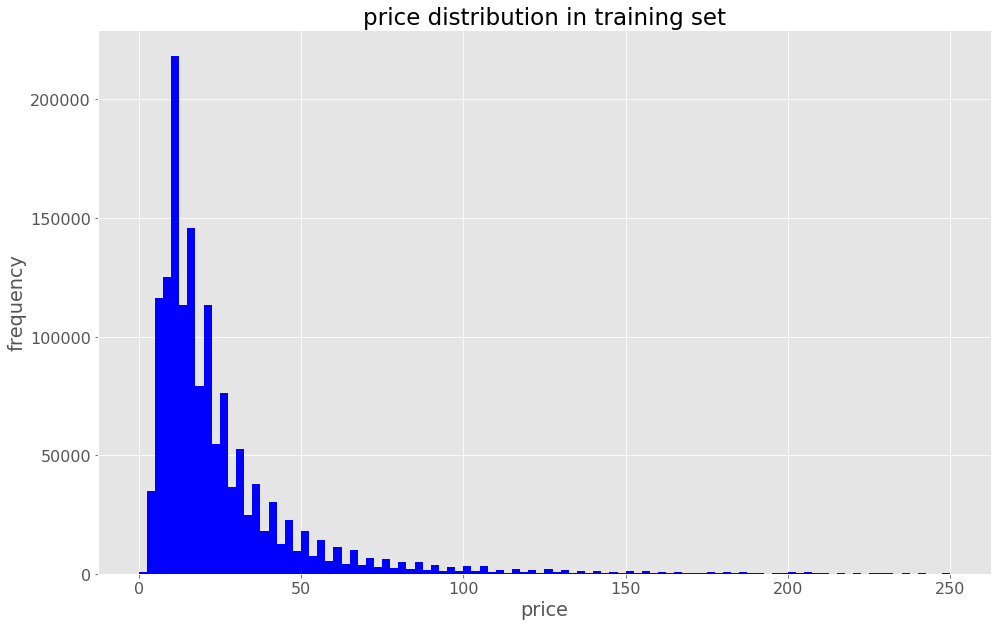

In [10]:
plt.hist(train['price'].values, range=(0, 250), bins=100, color='b')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('price distribution in training set')
plt.show()

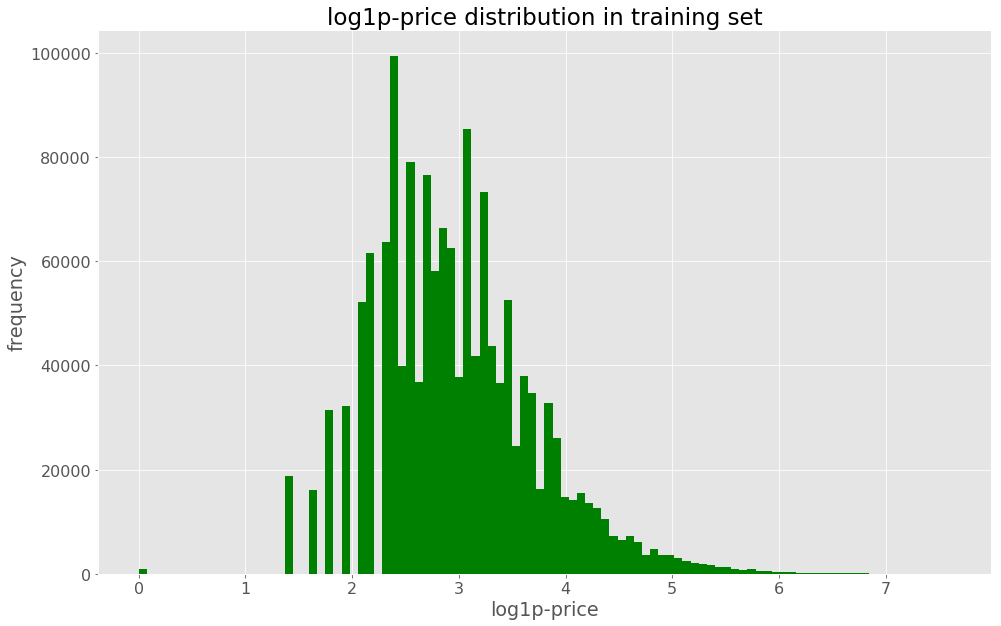

In [11]:
plt.hist(np.log1p(train['price'].values), bins=100, color='g')
plt.xlabel('log1p-price')
plt.ylabel('frequency')
plt.title('log1p-price distribution in training set')
plt.show()

In [12]:
train.groupby('shipping')['shipping'].count()

shipping
0    819435
1    663100
Name: shipping, dtype: int64

In [13]:
train.groupby('shipping')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
shipping,,,,,,,,
0,819435.0,30.111778,39.53592,0.0,13.0,20.0,33.0,2009.0
1,663100.0,22.567726,36.95579,0.0,8.0,14.0,25.0,2000.0


In [14]:
len(train.groupby('category_name')['category_name'].count())

1287

In [15]:
train['category_name'].value_counts(dropna=False).head()

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
Name: category_name, dtype: int64

In [16]:
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")

In [17]:
train['general_cat'], train['subcat_1'], train['subcat_2'] = zip(*train['category_name']
                                                                 .apply(lambda x: split_cat(x)))
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [18]:
train['general_cat'].value_counts()

Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
No Label                    6327
Name: general_cat, dtype: int64

In [19]:
train['subcat_1'].nunique()

114

In [20]:
train['subcat_2'].nunique()

871

In [21]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

x = train['general_cat'].value_counts().index.values.astype('str')

p = figure(x_range=x, plot_height=400, plot_width=800, title="General Categories",
           toolbar_location='above')

p.vbar(x=x, top=train['general_cat'].value_counts().values, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 0.7

show(p)

Loading BokehJS ...

In [22]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import viridis

output_notebook()
x = train['subcat_1'].value_counts().index.values.astype('str')[:15]
y = train['subcat_1'].value_counts().values[:15]
color = viridis(15)
source = ColumnDataSource(data=dict(x=x, y=y, color=color))
p = figure(x_range=x, plot_height=400, plot_width=800, title="Subcat_1",
           toolbar_location='above')
p.vbar(x='x', top='y', width=0.9, color='color', source=source)
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = 0.7
show(p)

Loading BokehJS ...

In [23]:
from bokeh.palettes import magma

output_notebook()
x = train['subcat_2'].value_counts().index.values.astype('str')[:15]
y = train['subcat_2'].value_counts().values[:15]
color = magma(15)
source = ColumnDataSource(data=dict(x=x, y=y, color=color))
p = figure(x_range=x, plot_height=400, plot_width=800, title="Subcat_2",
           toolbar_location='above')
p.vbar(x='x', top='y', width=0.9, color='color', source=source)
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = 1.57
show(p)

Loading BokehJS ...

In [24]:
train['brand_name'].nunique()

4809

In [25]:
from bokeh.palettes import inferno

output_notebook()
x = train['brand_name'].value_counts().index.values.astype('str')[:15]
y = train['brand_name'].value_counts().values[:15]
color = inferno(15)
source = ColumnDataSource(data=dict(x=x, y=y, color=color))
p = figure(x_range=x, plot_height=400, plot_width=800, title="brand_name",
           toolbar_location='above')
p.vbar(x='x', top='y', width=0.9, color='color', source=source)
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = 1.57
show(p)

Loading BokehJS ...